In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from PIL import Image

from skimage.morphology import skeletonize, thin
from skimage.util import invert
from skimage import measure
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
import seaborn as sns
sns.reset_orig()

from skimage import restoration

from skimage import exposure
from skimage.filters import gaussian

from scipy import ndimage

from time import time

from skimage.color import rgb2gray


from skimage.filters.rank import entropy
import scipy


import cv2
import networkx as nx
from scipy import interpolate

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import glob
from skimage.morphology import remove_small_objects
from skimage.morphology import disk
from skimage import io

import threading

/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [31]:
im=io.imread("/Users/spencerlab/Desktop/final_files/Day_3/#2/Stack_day_3_#2.tif")

In [32]:
#from PIL import Image
#from PIL.TiffTags import TAGS

#with Image.open('Stitch_9_G001.tif') as img:
#    meta_dict = {TAGS[key] : img.tag[key] for key in img.tag.keys()}

In [33]:
#meta_dict

In [34]:
for i in range(len(im)):
    b,g,r = cv2.split(im[i])
    
    
    
    d = (b>50)
    
    d = (d*255).astype('uint8')
    d = Image.fromarray(d)
    d.save('thymus2/newtest/'+str(i)+".tif")
    
    
    
    c = (b+r)/2> 50
    
    c = (c*255).astype('uint8')
    c = Image.fromarray(c)
    c.save('thymus2/newtest2/'+str(i)+".tif")
    
    
    
    e = (r>50)
    
    e = (e*255).astype('uint8')
    e = Image.fromarray(e)
    e.save('thymus2/newtest3/'+str(i)+".tif")
    
    

    

In [35]:
im2=io.imread("/Users/spencerlab/Downloads/thymus2/newtest.tif")
im3=io.imread("/Users/spencerlab/Downloads/thymus2/newtest2.tif")

In [36]:
def process1(f1,f2):
    value = np.logical_or(f1,f2)
    value2 = ndimage.binary_fill_holes(value)
    value3 = ndimage.binary_erosion(value2)
    value4 = np.logical_or(value3,f1)
    value5 = np.logical_or(value3,f2)
    value6 = ndimage.binary_fill_holes(value5)
    value7 = ndimage.binary_dilation(value6)
    return value7

In [37]:
def process2(f):
    
    stepSize = 30
    (w_width, w_height) = (stepSize, stepSize)
    prem= .50
    for x in range(0, f.shape[1] - w_width , stepSize):
        for y in range(0, f.shape[0] - w_height, stepSize):
            window = f[x:x + w_width, y:y + w_height]
            if(np.sum(window*1)<w_width*w_height*prem):

                f[x:x + w_width, y:y + w_height] = f[x:x + w_width, y:y + w_height]*0
   
    xxx = measure.label(f)
    list1 = np.unique(xxx)
    list2 = []
   
    for i in list1:
        list2.append(np.count_nonzero(xxx == i))
    l = np.sort(list2)
    l = l[::-1]
    lmao = l[4]
   
    f = remove_small_objects(f.astype(bool), min_size=(lmao-10), connectivity=1)
    return f
    

In [38]:
def process3(f):
    
    
    xxx = measure.label(f)
    list1 = np.unique(xxx)
    list2 = []
   
    for i in list1:
        list2.append(np.count_nonzero(xxx == i))
    l = np.sort(list2)
    l = l[::-1]
    lmao = l[4]
   
    f = remove_small_objects(f.astype(bool), min_size=(lmao-10), connectivity=1)
    return f
    

In [40]:
for x in range(182, len(im)):
    print(x)
    #lm = process2(process1(im2[x],im3[x])).astype('uint8')*255
    
    
    lm = process3(process1(im2[x],im3[x])).astype('uint8')*255
    a = Image.fromarray(lm)

    a.save('thymus2/newtest3/'+str(x)+".tif")

182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308


In [ ]:
print len(im)

In [17]:
im1=io.imread("red1.tif")
im2=io.imread("red2.tif")

In [18]:
for n in range(len(im1)):
    im3 = im1[n]*im2[n]
    im3= (im3*255).astype('uint8')
    im3 = Image.fromarray(im3)

    im3.save('red3/'+str(n)+".tif")

In [2]:
im3=io.imread("red7.tif")

In [4]:
def remove_noise(square):
    
    eroded_square = ndimage.binary_erosion(square)
    reconstruction = ndimage.binary_propagation(eroded_square, mask=square)
    reconstruction2 = ndimage.binary_closing(reconstruction)
    return reconstruction2

In [30]:
for n in range(230,240):
    denoised = remove_noise(im3[n])
    denoised3 = remove_small_objects(denoised, min_size=100, connectivity=10)
    img=denoised3
    new_img = np.zeros_like(img)                                        
    for val in np.unique(img)[1:]:                                       
        mask = np.uint8(img == val)                                     
        labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]  
        largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])   

        new_img[labels == largest_label] = val                          

    array = denoised3
    arr=measure.label(array, 8,connectivity = 2)
    #arr =measure.label(arr1, 8,connectivity = 2)
    unk = np.unique(arr)
    mask = np.zeros(array.shape)
    great_ran = np.where(new_img>0)

#print(size)
    for i in range(1, len(unk)):
        cluster = (arr==i)
        clt_pts = np.where(cluster==True)
        co_ordinates =np.where(arr==unk[i])
        y_c = co_ordinates[0][-1]
        x_c = co_ordinates[1][-1]
        #print((np.asarray(clt_pts)[0] ))
        
        if x_c in range(min(great_ran[1])-40,max(great_ran[1])+40) and y_c in range(min(great_ran[0])-40,max(great_ran[0])+40) :
            mask=mask+cluster
    a = Image.fromarray(mask)
    a.save("x/"+str(n)+".tif")
    print(n)
#plt.figure(figsize=(20,20))
#plt.imshow(a)

230
231
232
233
234
235
236
237
238
239


In [6]:
for n in range(583,822):
    denoised = remove_noise(im3[n])
    denoised3 = remove_small_objects(denoised, min_size=1000, connectivity=1)
    img=denoised3
    new_img = np.zeros_like(img)                                        
    for val in np.unique(img)[1:]:                                       
        mask = np.uint8(img == val)                                     
        labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]  
        largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])   

        new_img[labels == (largest_label)] = val                          

    array = denoised3
    arr=measure.label(array, 8,connectivity = 2)
    #arr =measure.label(arr1, 8,connectivity = 2)
    unk = np.unique(arr)
    mask = np.zeros(array.shape)
    great_ran = np.where(new_img>0)

#print(size)
    #for i in range(1, len(unk)):
     #   cluster = (arr==i)
      #  clt_pts = np.where(cluster==True)
       # co_ordinates =np.where(arr==unk[i])
       # y_c = co_ordinates[0][-1]
        #x_c = co_ordinates[1][-1]
        #print((np.asarray(clt_pts)[0] ))
        
        #if x_c in range(min(great_ran[1])-20,max(great_ran[1])+20) and y_c in range(min(great_ran[0])-100,max(great_ran[0])+100) :
            #mask=mask+cluster
    denoised3 = remove_small_objects(denoised3.astype(bool), min_size=100, connectivity=1).astype('uint8')*255
    a = Image.fromarray(denoised3.astype('uint8')*255)
    a.save("x/"+str(n)+".tif")
    print(n)
#plt.figure(figsize=(20,20))
#plt.imshow(a)

583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821


In [284]:
cells_centroid = []
array = denoised3
lab=measure.label(array, 8,connectivity = 2)
#arr =measure.label(arr1, 8,connectivity = 2)
unk = np.unique(arr)
for i in range(0, len(unk)):
    
    print(i)
    co_ordinates =np.where(lab==unk[i])
    y_c = co_ordinates[0][1]
    x_c = co_ordinates[1][1]
    print(str(y_c)+"   "+str(x_c))



0
0   1
1
490   1451
2
513   1374
3
546   1438
4
623   1714
5
805   1548
6
809   1525
7
813   1575
8
829   1547
9
856   1744
10
898   1839
11
954   1542
12
1038   1052
13
1087   1042
14
1156   1868
15
1171   981
16
1178   2034
17
1204   1932
18
1210   1868
19
1212   971
20
1220   2414
21
1230   1922
22
1270   2781
23
1275   2232
24
1285   958
25
1300   2075
26
1304   1082
27
1307   2162
28
1313   2032
29
1314   1060
30
1320   967
31
1323   980
32
1324   1078
33
1330   941
34
1341   2135
35
1352   2168
36
1357   2153
37
1358   2512
38
1360   2761
39
1368   1264
40
1404   2266
41
1413   2205
42
1482   2285
43
1492   1508
44
1500   1454
45
1511   1541
46
1516   2635
47
1526   1568
48
1532   2668
49
1548   921
50
1563   2592
51
1565   1061
52
1585   2607
53
1613   2642
54
1651   1878
55
1656   2110
56
1658   1805
57
1673   649
58
1673   636
59
1684   1773
60
1684   1851
61
1690   2658
62
1698   1784
63
1700   2691
64
1723   2671
65
1725   2606
66
1737   1667
67
1740   2571
68
1740   1787
6

In [27]:
im3=io.imread("x.tif")


In [30]:
edges = cv2.Canny(im3[30].astype('uint8')*255,500,400)


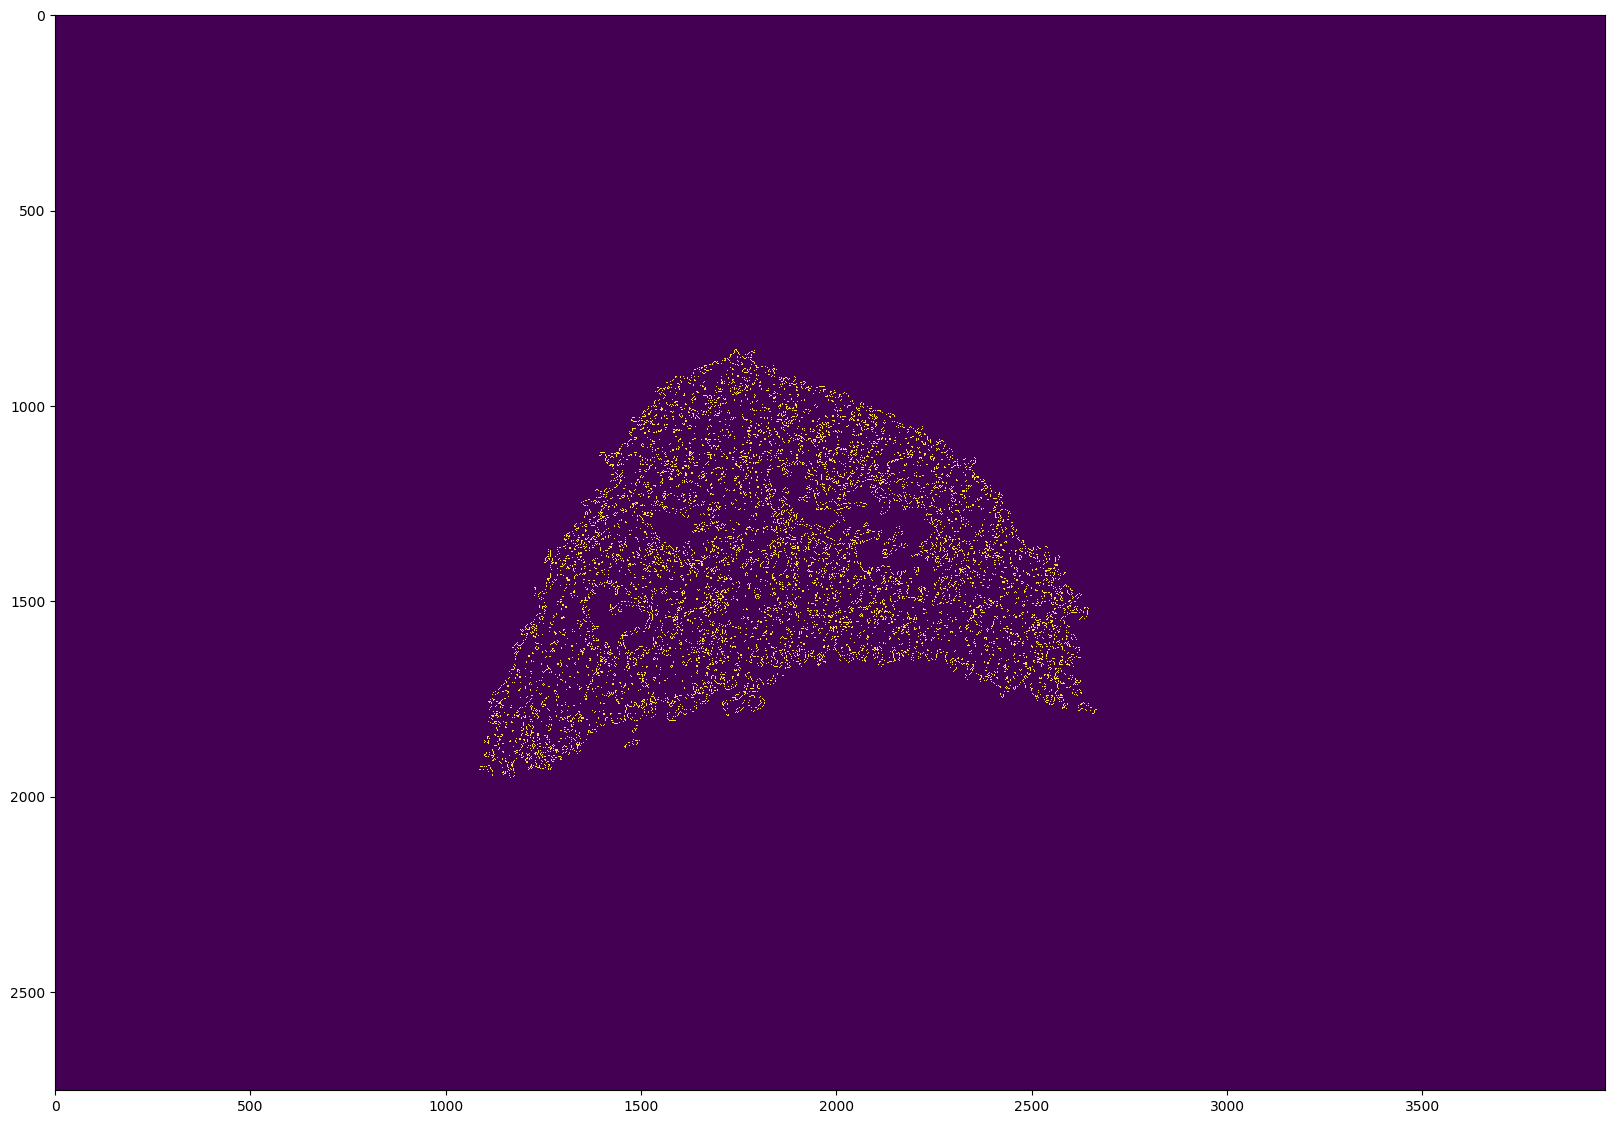

In [31]:
plt.figure(figsize=(20,20))
plt.imshow(edges>0)

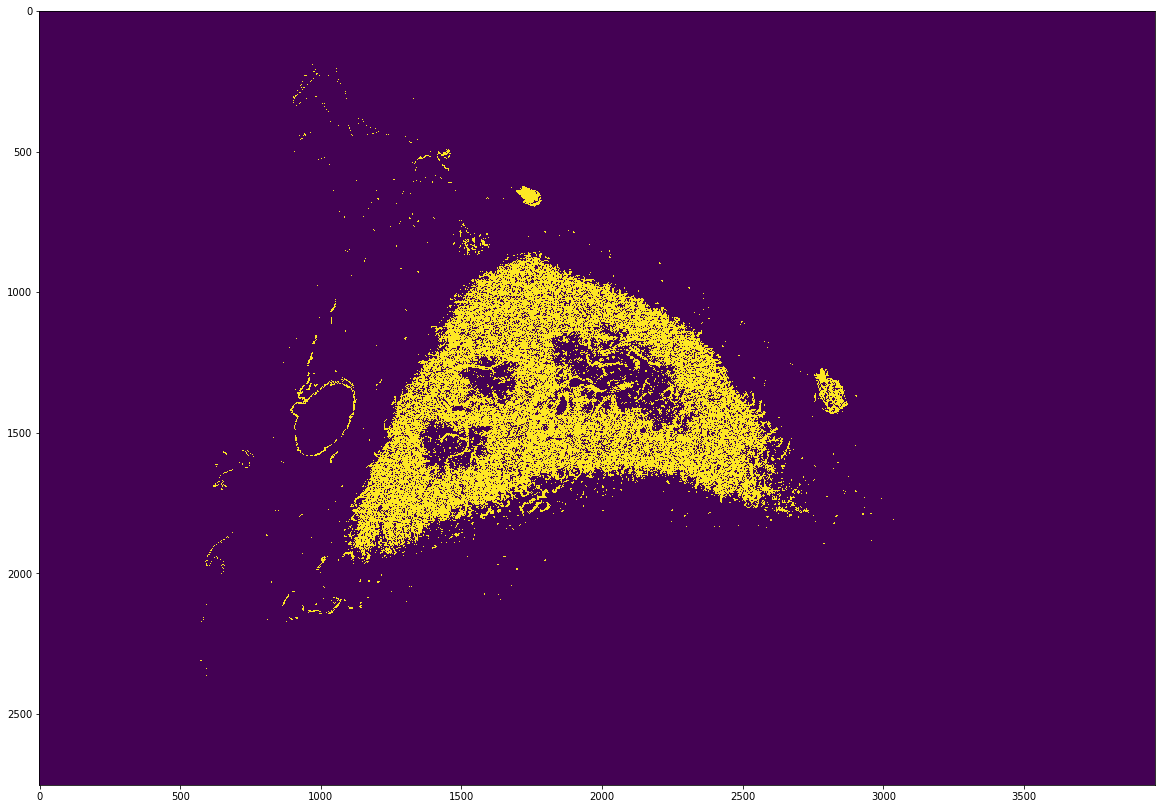

In [303]:
plt.figure(figsize=(20,20))
plt.imshow(im3[30])

In [9]:
x=169
while True:
    array = im3[x]

    size = 400
    arr=measure.label(array, 8)
    unk = np.unique(arr)
    mask = np.zeros(array.shape)
    
    for i in range(1, len(unk)):
        cluster = (arr==i)
        clt_pts = np.where(cluster==True)
        #print((np.asarray(clt_pts)[0] ))
        if len(np.asarray(clt_pts)[0] ) > size:
            mask=mask+cluster
    a = Image.fromarray(mask)
    plt.imshow(a)
    x +=1
    if x>196:
        break

KeyboardInterrupt: 

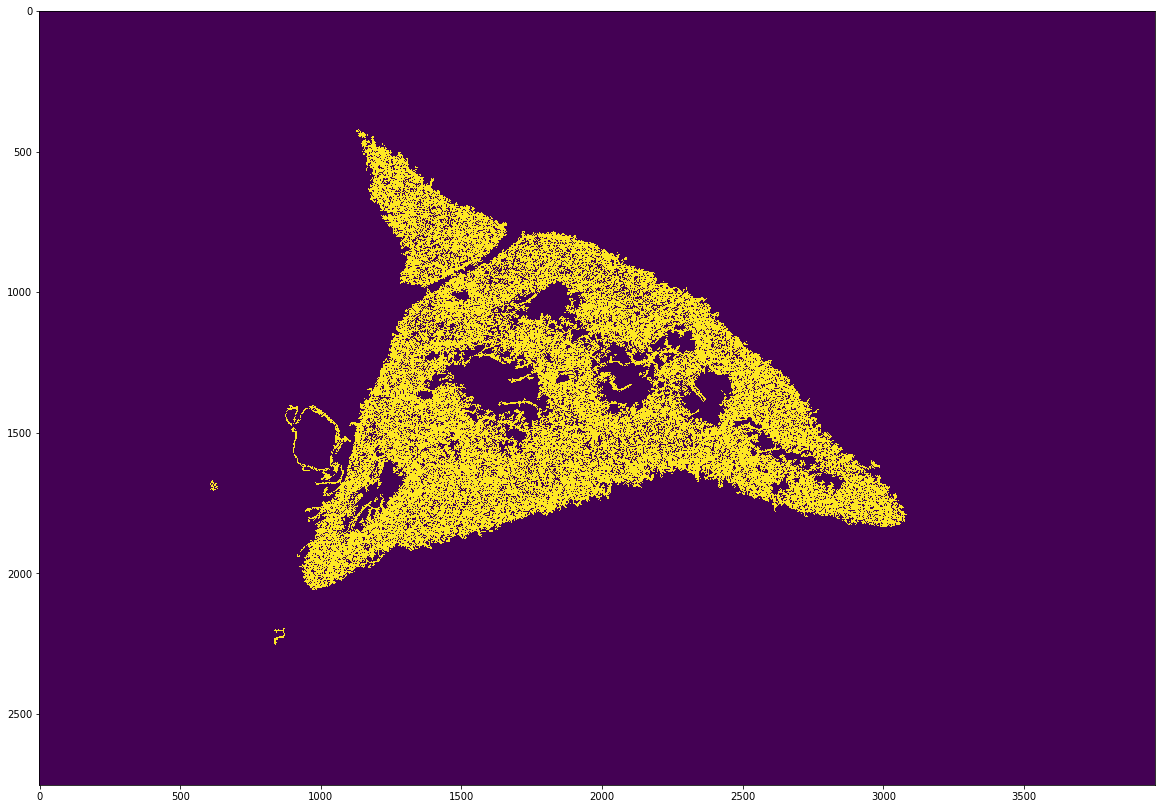

In [45]:
plt.figure(figsize=(20,20))
plt.imshow(a)

In [8]:
im=io.imread("x.tif")

In [ ]:
LinearNDInterpolator(im, values, fill_value=np.nan, rescale=False)

In [5]:
from numpy import array
from scipy.interpolate import RegularGridInterpolator as rgi
my_interpolating_function = rgi((x,y,z), V)
Vi = my_interpolating_function(array([xi,yi,zi]).T)

NameError: name 'x' is not defined